In [1]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-de5f37d95e31>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
sparkling_df = pd.read_csv("Sparkling.csv", parse_dates = True, index_col = 'YearMonth')


In [3]:
sparkling_df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [4]:
sparkling_df.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [5]:
sparkling_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [6]:
sparkling_df.isnull().sum()

Sparkling    0
dtype: int64

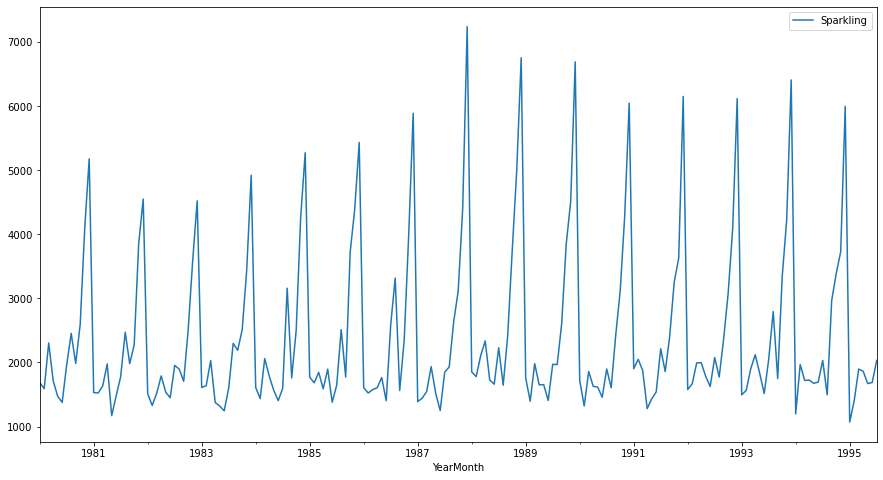

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
sparkling_df.plot()
plt.show()


In [8]:
sparkling_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sparkling,187.0,2402.417112,1295.11154,1070.0,1605.0,1874.0,2549.0,7242.0


In [9]:
sparkling_df[sparkling_df['Sparkling'].isna()]

,Sparkling
YearMonth,


# Univariate

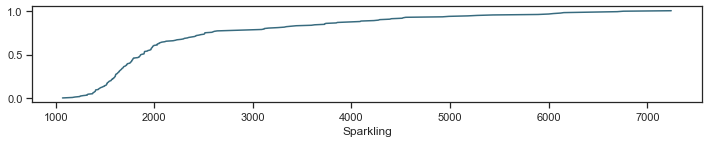

In [10]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(sparkling_df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sparkling');

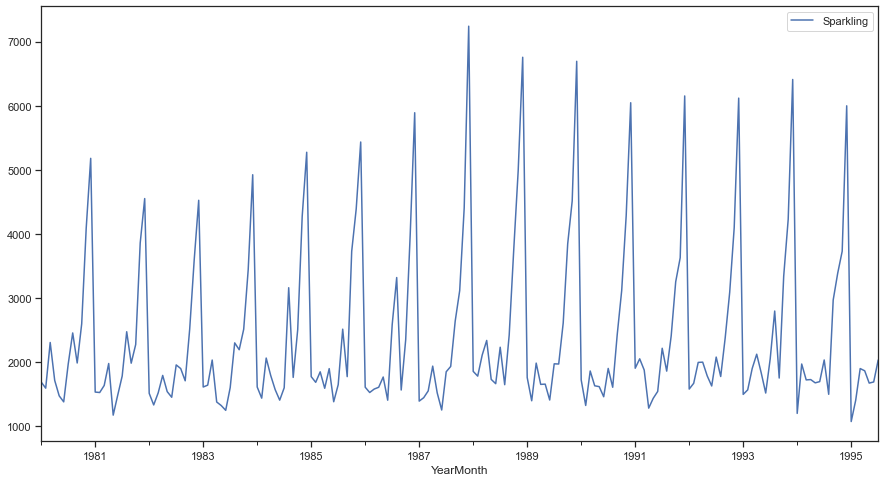

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
sparkling_df.plot()
plt.show()


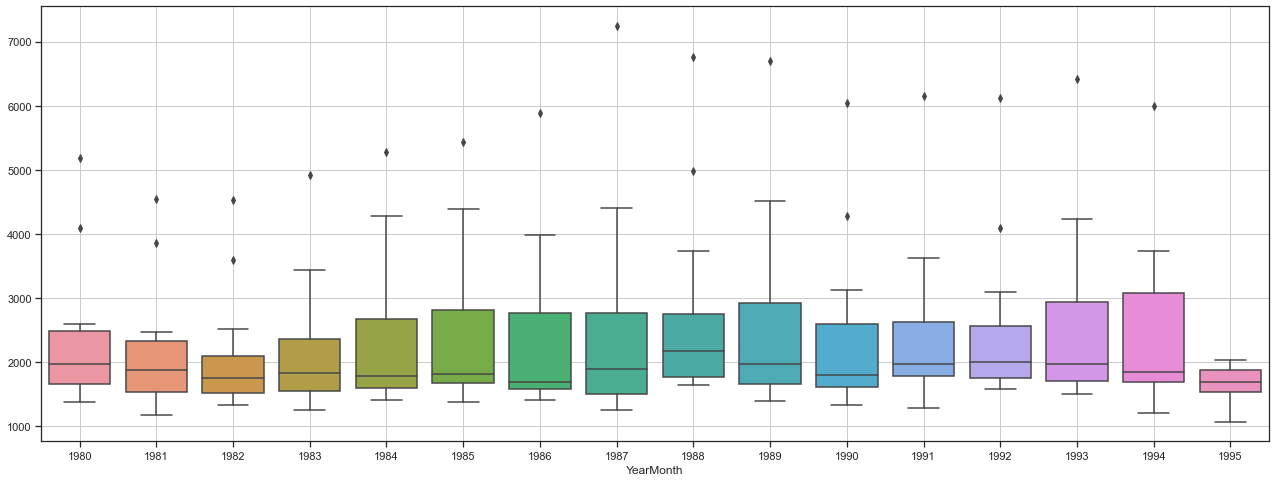

In [12]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = sparkling_df.index.year,y = sparkling_df.values[:,0],ax=ax)
plt.grid();

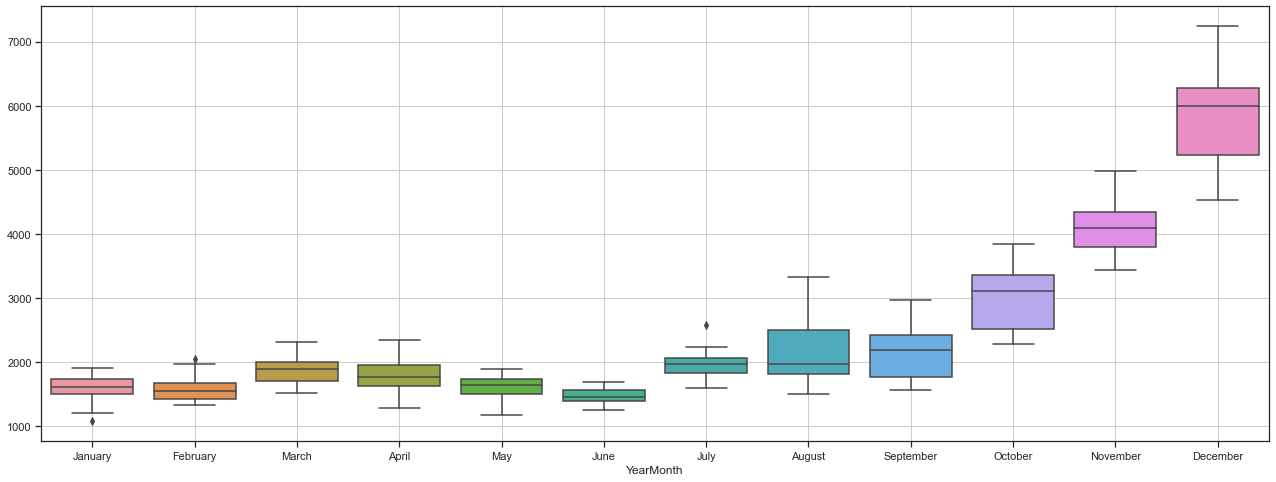

In [13]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = sparkling_df.index.month_name(),y = sparkling_df.values[:,0],ax=ax)
plt.grid();

In [14]:
monthly_sales_across_years = pd.pivot_table(sparkling_df, values = 'Sparkling', columns = sparkling_df.index.month_name(), index = sparkling_df.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


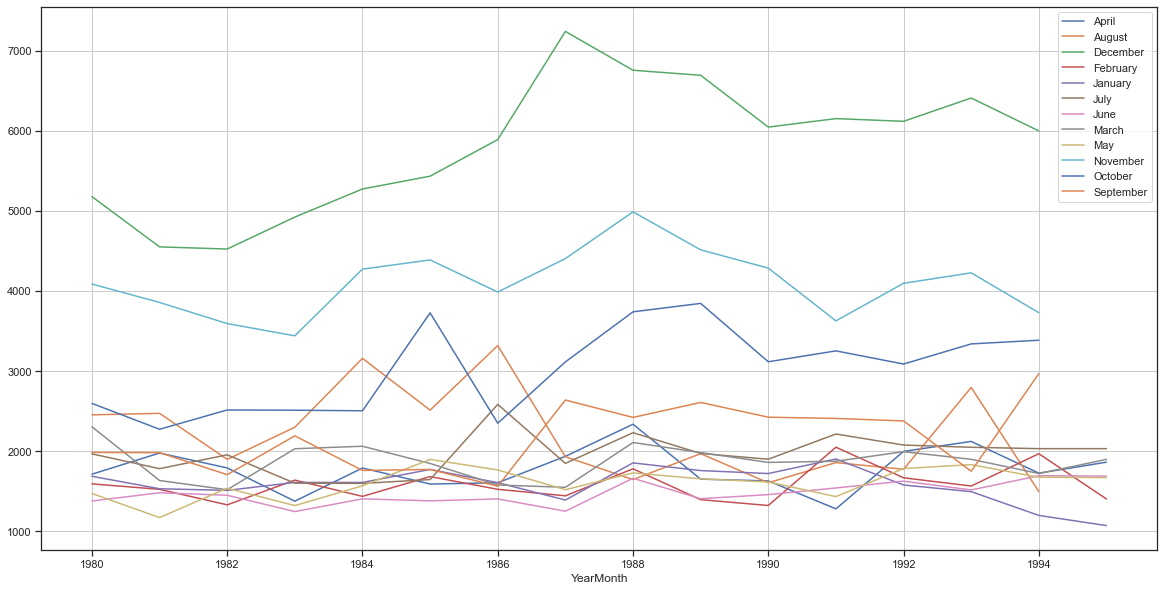

In [15]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

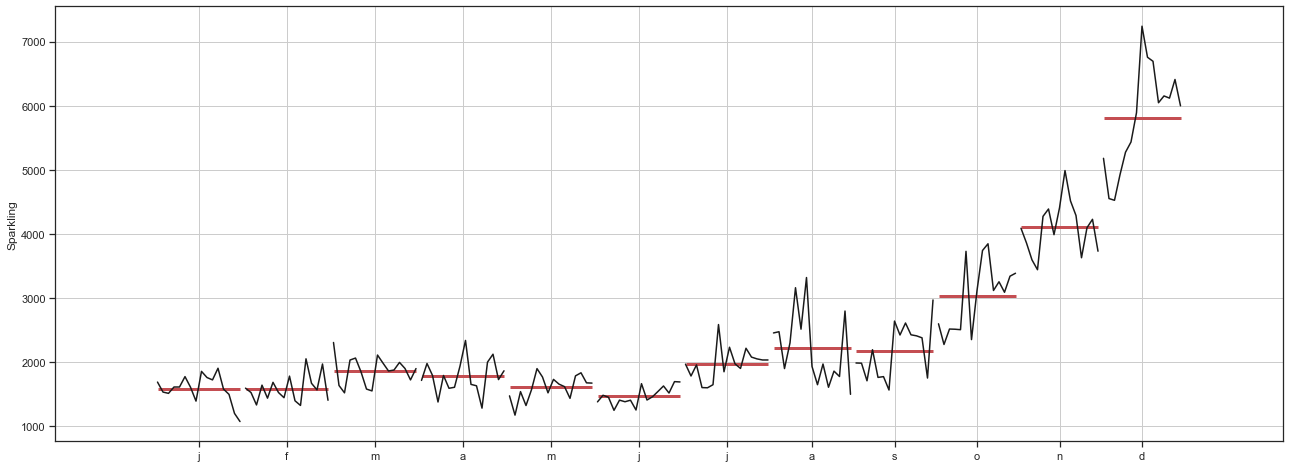

In [16]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(sparkling_df,ylabel='Sparkling',ax=ax)
plt.grid();

In [17]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

In [18]:
rose_add_decompose = seasonal_decompose(sparkling_df, model = 'additive', period = 12)

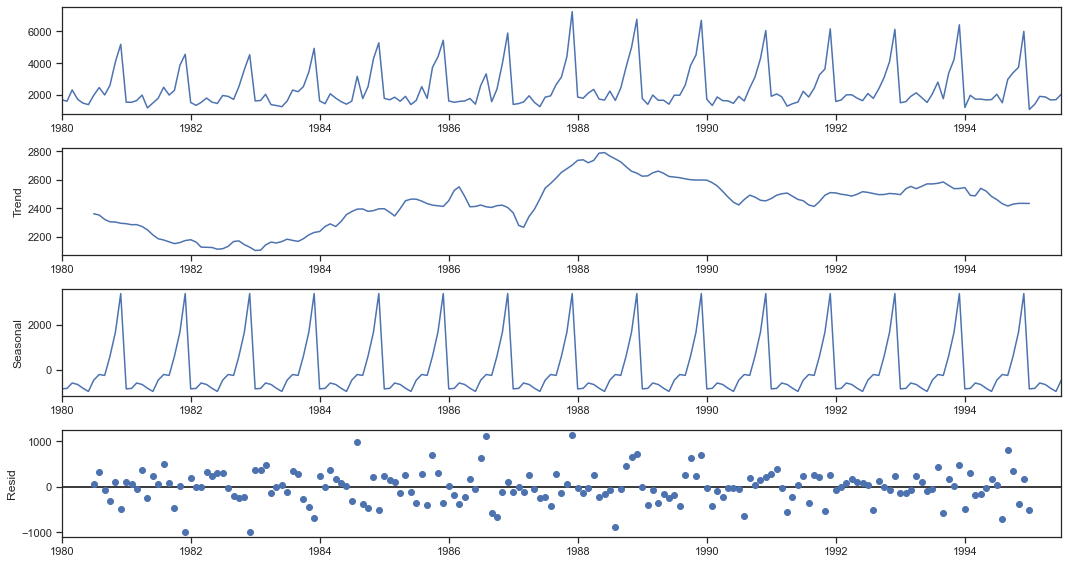

In [19]:
rose_add_decompose.plot();

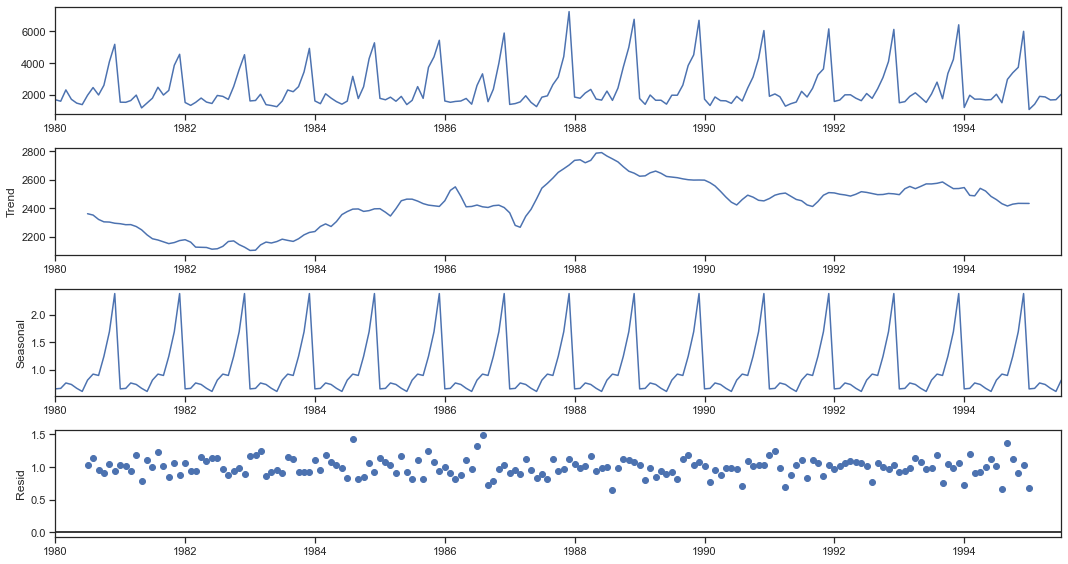

In [20]:
decomposition = seasonal_decompose(sparkling_df,model='multiplicative')
decomposition.plot();

# Data Split

In [21]:
train = sparkling_df[sparkling_df.index.year<1991] 
test = sparkling_df[sparkling_df.index.year>=1991]

In [22]:
print('===Train Head==')
display(train.head())
print('===Train Tail==')
display(train.tail())
print('===Test Head==')
display(test.head())
print('===Test Tail==')
display(test.tail())

===Train Head==


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


===Train Tail==


,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


===Test Head==


,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


===Test Tail==


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [23]:
train.shape

(132, 1)

In [24]:
test.shape

(55, 1)

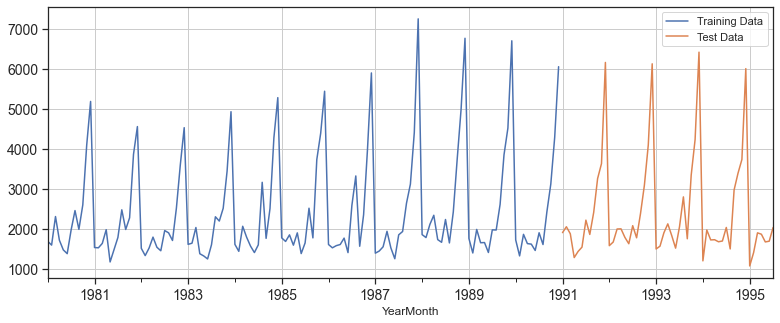

In [25]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Linear Regression

In [26]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [27]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [28]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [30]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

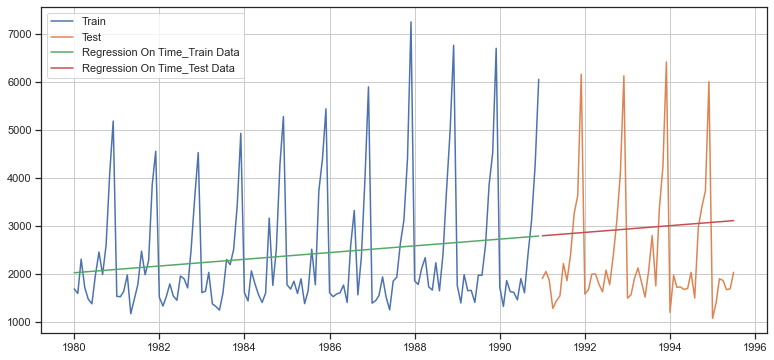

In [31]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1
LinearRegression_test['RegOnTime'] = test_predictions_model1


plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [32]:
from sklearn import metrics
rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Train Data,  RMSE is %3.3f" %(rmse_model1_train))

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Train Data,  RMSE is 1279.322
For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [33]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175


# Naive Approach

In [34]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [35]:
NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

YearMonth
1980-01-01    6047
1980-02-01    6047
1980-03-01    6047
1980-04-01    6047
1980-05-01    6047
Name: naive, dtype: int64

In [36]:
NaiveModel_train.shape

(132, 2)

In [37]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

In [38]:
NaiveModel_test

,Sparkling,naive
YearMonth,,
1991-01-01,1902,6047
1991-02-01,2049,6047
1991-03-01,1874,6047
1991-04-01,1279,6047
1991-05-01,1432,6047
1991-06-01,1540,6047
1991-07-01,2214,6047
1991-08-01,1857,6047
1991-09-01,2408,6047


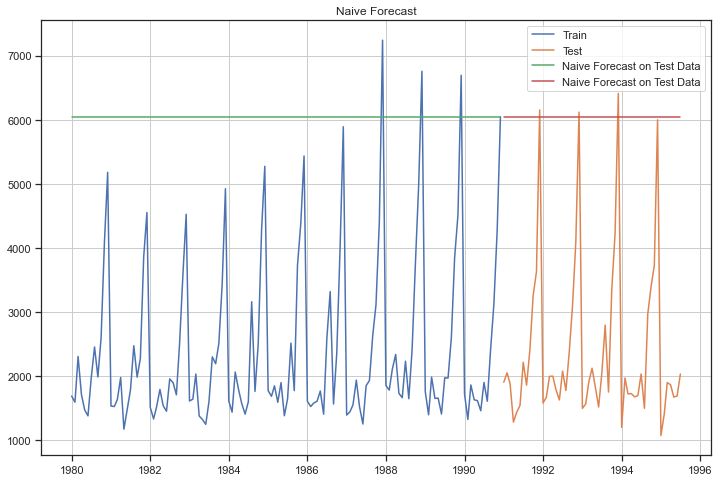

In [39]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [40]:
rmse_model2_train = metrics.mean_squared_error(NaiveModel_train['Sparkling'],NaiveModel_train['naive'],squared=False)


print("For Naive forecast on the Train Data,  RMSE is %3.3f" %(rmse_model2_train))


For Naive forecast on the Train Data,  RMSE is 3867.701


In [41]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive forecast on the Test Data,  RMSE is 3864.279


In [42]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


# Simple Average

In [43]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [44]:
SimpleAverage_train['mean_Sparkling'] = train['Sparkling'].mean()
SimpleAverage_train.head()

,Sparkling,mean_Sparkling
YearMonth,,
1980-01-01,1686,2403.780303
1980-02-01,1591,2403.780303
1980-03-01,2304,2403.780303
1980-04-01,1712,2403.780303
1980-05-01,1471,2403.780303


In [45]:
SimpleAverage_test['mean_Sparkling'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_Sparkling
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


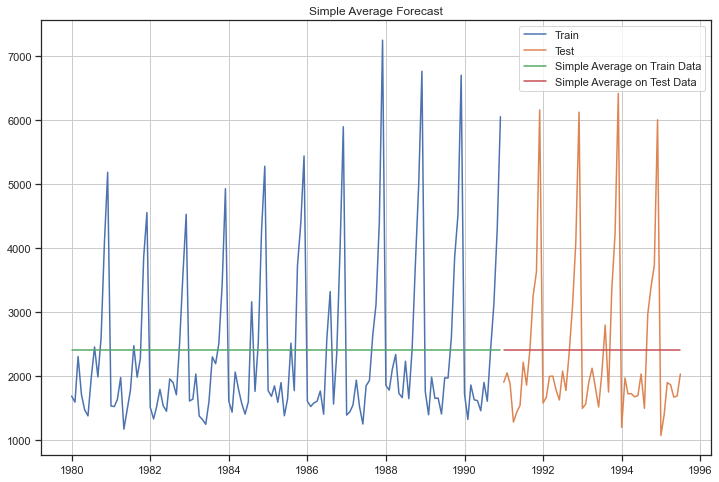

In [46]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_Sparkling'], label='Simple Average on Train Data')
plt.plot(SimpleAverage_test['mean_Sparkling'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [47]:
rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_Sparkling'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_train))

For Simple Average forecast on the Test Data,  RMSE is 1298.484


In [48]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_Sparkling'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [49]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


# Moving Average

In [50]:
MovingAverage = sparkling_df.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [51]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


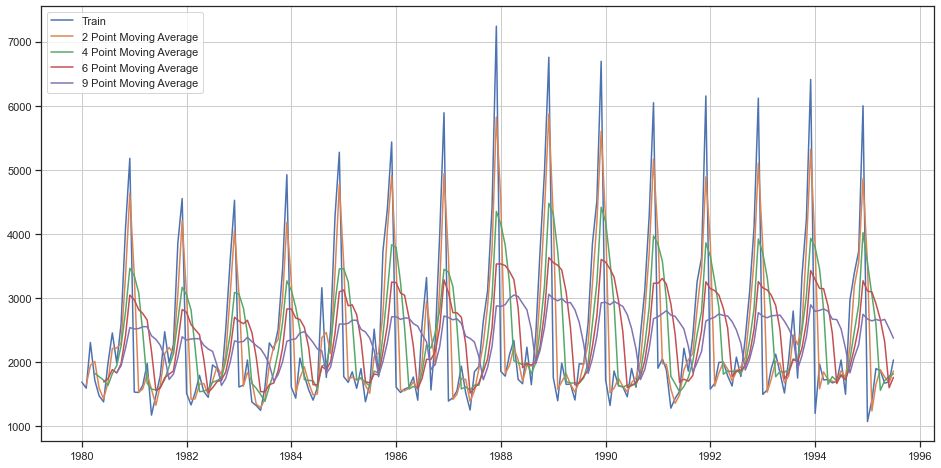

In [52]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [53]:
MovingAverage

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN
...,...,...,...,...,...
1995-03-01,1897,1649.5,2592.00,2913.666667,2664.000000
1995-04-01,1862,1879.5,1557.75,2659.833333,2645.222222
1995-05-01,1670,1766.0,1707.75,2316.666667,2664.666667


In [54]:
MovingAverage_train = MovingAverage[MovingAverage.index.year<1991] 
MovingAverage_test = MovingAverage[MovingAverage.index.year>=1991]

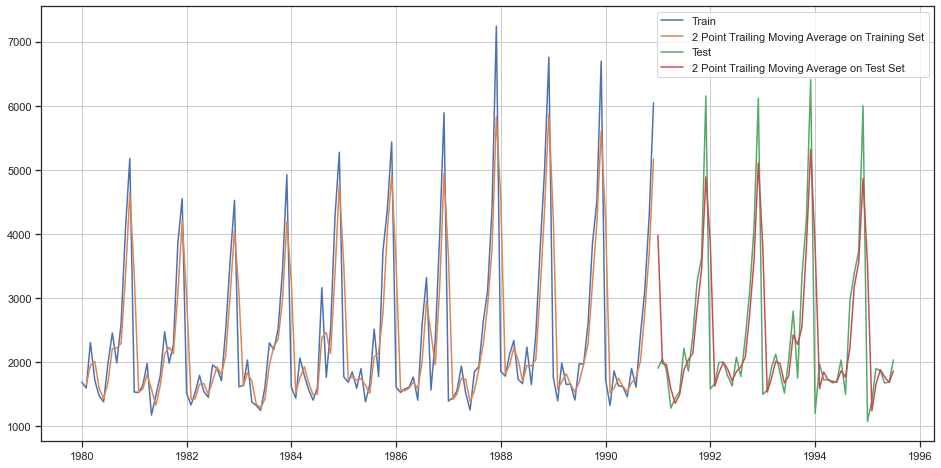

In [55]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['Sparkling'], label='Train')

plt.plot(MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.plot(MovingAverage_test['Sparkling'], label='Test')
plt.plot(MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();

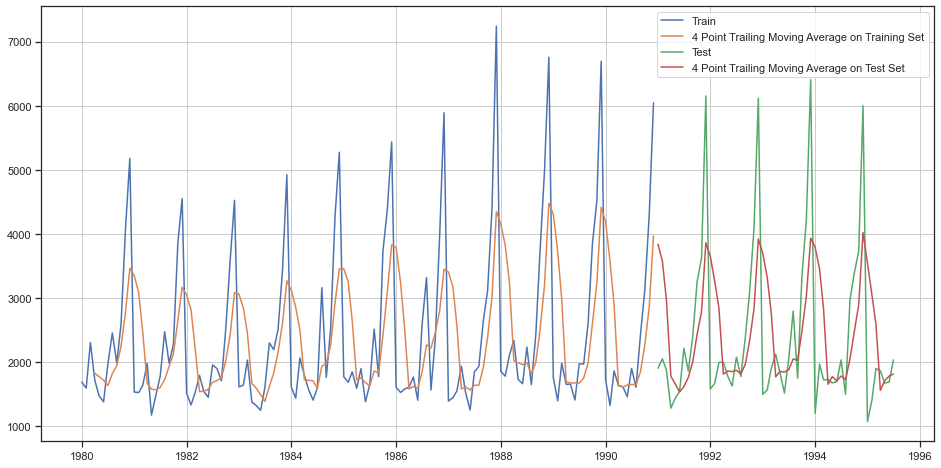

In [56]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['Sparkling'], label='Train')

plt.plot(MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')

plt.plot(MovingAverage_test['Sparkling'], label='Test')
plt.plot(MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();

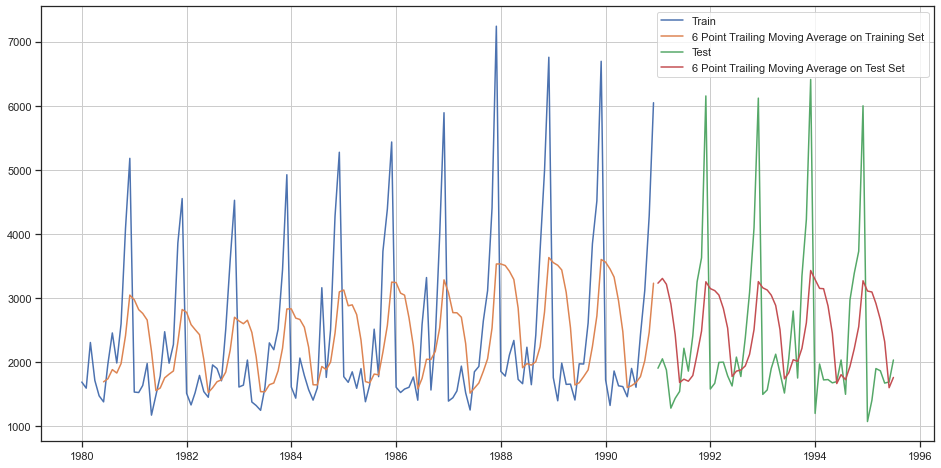

In [57]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['Sparkling'], label='Train')


plt.plot(MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_test['Sparkling'], label='Test')

plt.plot(MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

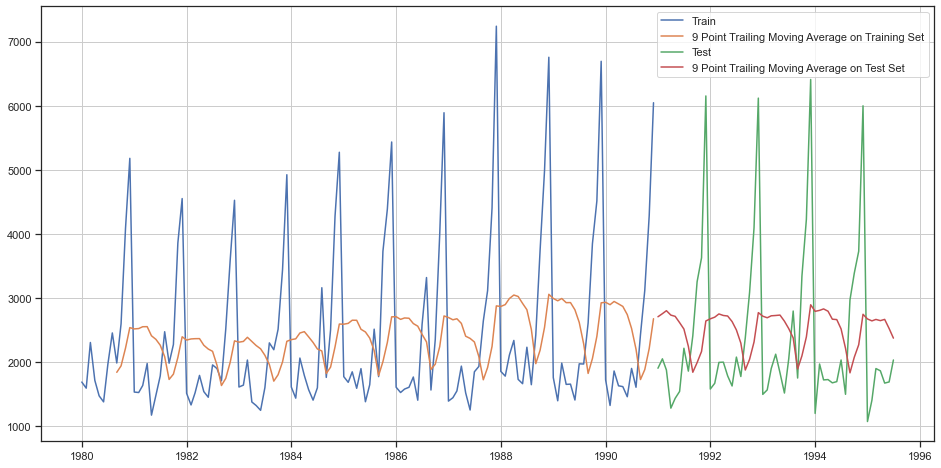

In [58]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['Sparkling'], label='Train')


plt.plot(MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_test['Sparkling'], label='Test')

plt.plot(MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [59]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


# All Model Comparison

In [60]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf.sort_values(by='Test RMSE')

,Test RMSE
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
SimpleAverageModel,1275.081804
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
RegressionOnTime,1389.135175
NaiveModel,3864.279352


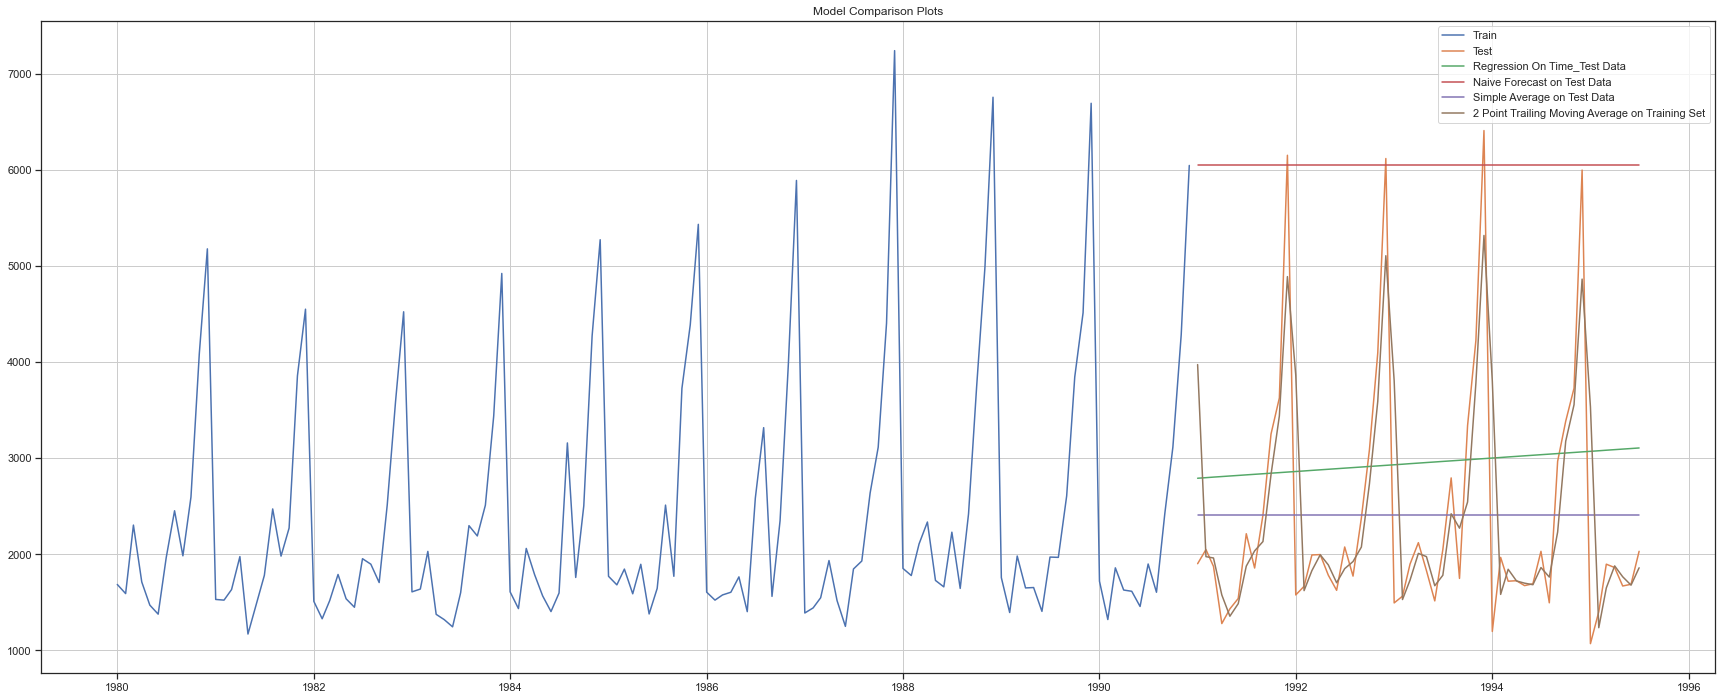

In [61]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_Sparkling'], label='Simple Average on Test Data')

plt.plot(MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Model 5: Simple Exponential Smoothing (Holt's Model)

In [62]:
import statsmodels.tools.eval_measures as      em

In [63]:
train.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [64]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [65]:
SES_train = train.copy()
SES_test = test.copy()

In [66]:
model_SES = SimpleExpSmoothing(SES_train,initialization_method='estimated' )

In [67]:
model_SES_autofit = model_SES.fit(optimized=True)

In [68]:
model_SES_autofit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
SES_predict_spark = model_SES_autofit.forecast(steps=len(SES_test))
SES_predict_spark

1991-01-01    2804.675124
1991-02-01    2804.675124
1991-03-01    2804.675124
1991-04-01    2804.675124
1991-05-01    2804.675124
1991-06-01    2804.675124
1991-07-01    2804.675124
1991-08-01    2804.675124
1991-09-01    2804.675124
1991-10-01    2804.675124
1991-11-01    2804.675124
1991-12-01    2804.675124
1992-01-01    2804.675124
1992-02-01    2804.675124
1992-03-01    2804.675124
1992-04-01    2804.675124
1992-05-01    2804.675124
1992-06-01    2804.675124
1992-07-01    2804.675124
1992-08-01    2804.675124
1992-09-01    2804.675124
1992-10-01    2804.675124
1992-11-01    2804.675124
1992-12-01    2804.675124
1993-01-01    2804.675124
1993-02-01    2804.675124
1993-03-01    2804.675124
1993-04-01    2804.675124
1993-05-01    2804.675124
1993-06-01    2804.675124
1993-07-01    2804.675124
1993-08-01    2804.675124
1993-09-01    2804.675124
1993-10-01    2804.675124
1993-11-01    2804.675124
1993-12-01    2804.675124
1994-01-01    2804.675124
1994-02-01    2804.675124
1994-03-01  

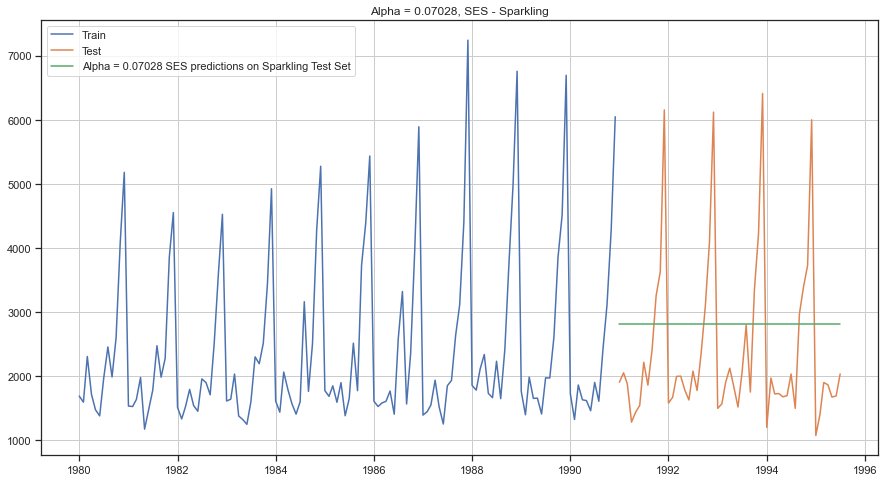

In [70]:
plt.plot(SES_train, label='Train')
plt.plot(SES_test, label='Test')

plt.plot(SES_predict_spark, label='Alpha = 0.07028 SES predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07028, SES - Sparkling');

In [71]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [72]:
print('SES RMSE:',metrics.mean_squared_error(SES_test.values,SES_predict_spark.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(SES_test.values,SES_predict_spark.values)[0])

SES RMSE: 1338.0083844916467
SES RMSE (calculated using statsmodels): 1338.0083844916464


In [73]:
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


In [74]:
resultsDf_sses = pd.DataFrame({'Test RMSE': [em.rmse(SES_test.values,SES_predict_spark.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_sses])
resultsDf


,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Simple Exponential Smoothing,1338.008384


# Double Exponential Smoothing(A,A)

In [75]:
model_DES = Holt(train,initialization_method='estimated')
model_DES = model_DES.fit()
print(model_DES.params)

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [76]:
DES_predict_spark =  model_DES.forecast(len(test))
DES_predict_spark

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

Text(0.5, 1.0, 'Simple and Double Exponential Smoothing Predictions - Sparkling')

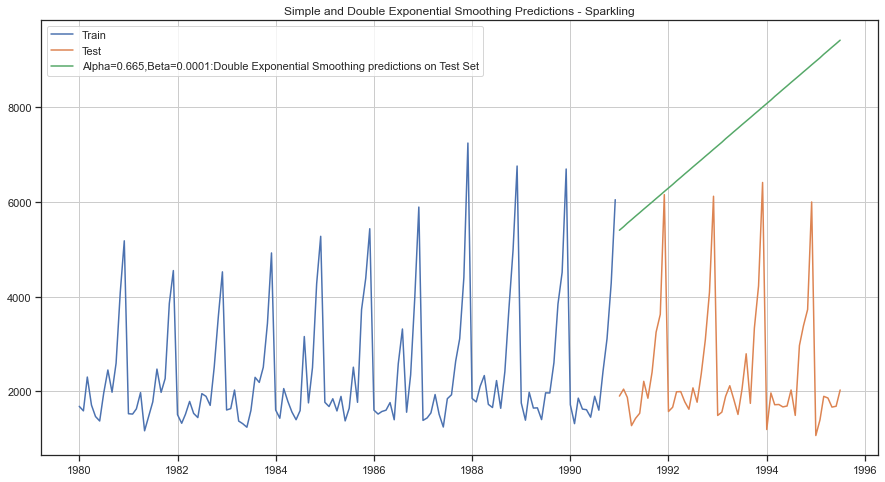

In [77]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict_spark, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Sparkling')

In [78]:
print('DES RMSE:',metrics.mean_squared_error(test.values,DES_predict_spark.values,squared=False))

DES RMSE: 5291.8798332269125


In [79]:
resultsDf_DES= pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,DES_predict_spark.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_DES])
resultsDf


,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Simple Exponential Smoothing,1338.008384
Double Exponential Smoothing,5291.879833


# Holt's Winter A,A

In [80]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()
model_TES.params

{'smoothing_level': 0.11127217746964548,
 'smoothing_trend': 0.012360783178126748,
 'smoothing_seasonal': 0.46071776538894016,
 'damping_trend': nan,
 'initial_level': 2356.578364436942,
 'initial_trend': -0.018474239476475418,
 'initial_seasons': array([-636.23349217, -722.98352055, -398.6435547 , -473.43067518,
        -808.42508553, -815.35030575, -384.23066985,   72.99524975,
        -237.44267238,  272.32595851, 1541.37820976, 2590.07753817]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
TES_predict_add_spark =  model_TES.forecast(len(test))
TES_predict_add_spark

1991-01-01    1490.574551
1991-02-01    1204.714462
1991-03-01    1688.941256
1991-04-01    1551.450972
1991-05-01    1461.440602
1991-06-01    1278.907350
1991-07-01    1805.164222
1991-08-01    1679.251604
1991-09-01    2315.687875
1991-10-01    3225.309145
1991-11-01    4299.652613
1991-12-01    6411.161656
1992-01-01    1483.296915
1992-02-01    1197.436826
1992-03-01    1681.663620
1992-04-01    1544.173336
1992-05-01    1454.162966
1992-06-01    1271.629714
1992-07-01    1797.886586
1992-08-01    1671.973968
1992-09-01    2308.410239
1992-10-01    3218.031509
1992-11-01    4292.374977
1992-12-01    6403.884020
1993-01-01    1476.019279
1993-02-01    1190.159190
1993-03-01    1674.385984
1993-04-01    1536.895700
1993-05-01    1446.885330
1993-06-01    1264.352078
1993-07-01    1790.608950
1993-08-01    1664.696332
1993-09-01    2301.132603
1993-10-01    3210.753873
1993-11-01    4285.097341
1993-12-01    6396.606384
1994-01-01    1468.741643
1994-02-01    1182.881554
1994-03-01  

Text(0.5, 1.0, ' Triple Exponential Smoothing Predictions- Sparkling')

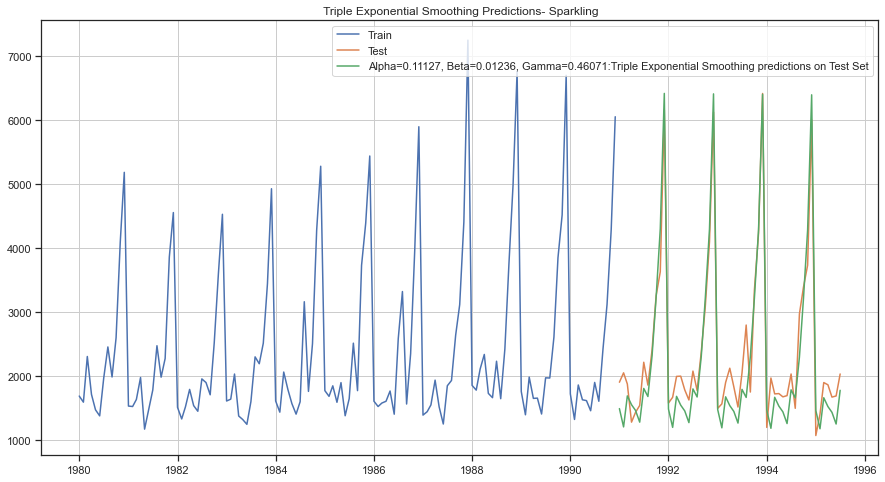

In [82]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title(' Triple Exponential Smoothing Predictions- Sparkling')

In [83]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp1])
resultsDf


,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Simple Exponential Smoothing,1338.008384
Double Exponential Smoothing,5291.879833
Triple Exponential Smoothing (Additive Season),378.626008


# Holt-Winters - ETS(A, M)

In [84]:
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

model_TES_am.params

{'smoothing_level': 0.11101523064586813,
 'smoothing_trend': 0.0493150519338607,
 'smoothing_seasonal': 0.3624464792152574,
 'damping_trend': nan,
 'initial_level': 2356.4981157471807,
 'initial_trend': -9.804740061967985,
 'initial_seasons': array([0.71351261, 0.68262962, 0.90447098, 0.80523467, 0.65565848,
        0.65382021, 0.88609683, 1.13334681, 0.91877227, 1.21174825,
        1.87063097, 2.37421776]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [85]:
TES_predict_am_spark =  model_TES_am.forecast(len(test))
TES_predict_am_spark

1991-01-01    1587.921914
1991-02-01    1356.650344
1991-03-01    1763.350219
1991-04-01    1656.523868
1991-05-01    1542.386219
1991-06-01    1355.480857
1991-07-01    1854.708560
1991-08-01    1820.665822
1991-09-01    2277.675614
1991-10-01    3123.118775
1991-11-01    4130.016056
1991-12-01    5893.139956
1992-01-01    1539.025473
1992-02-01    1314.767912
1992-03-01    1708.771760
1992-04-01    1605.119264
1992-05-01    1494.399399
1992-06-01    1313.199426
1992-07-01    1796.703973
1992-08-01    1763.577111
1992-09-01    2206.069820
1992-10-01    3024.675950
1992-11-01    3999.492295
1992-12-01    5706.403171
1993-01-01    1490.129033
1993-02-01    1272.885480
1993-03-01    1654.193301
1993-04-01    1553.714661
1993-05-01    1446.412578
1993-06-01    1270.917996
1993-07-01    1738.699385
1993-08-01    1706.488400
1993-09-01    2134.464026
1993-10-01    2926.233125
1993-11-01    3868.968534
1993-12-01    5519.666385
1994-01-01    1441.232592
1994-02-01    1231.003048
1994-03-01  

Text(0.5, 1.0, 'Triple Exponential Smoothing Predictions (Mult Season) - Sparkling')

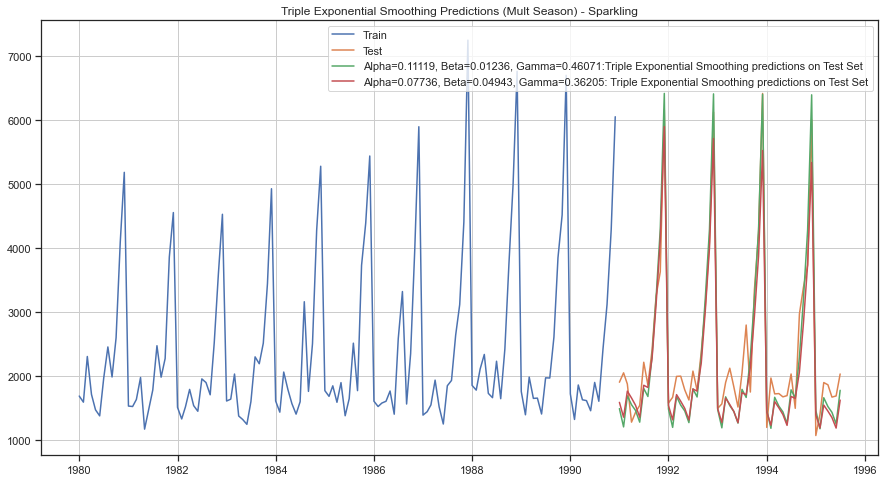

In [86]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')


plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_predict_am_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205: Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions (Mult Season) - Sparkling')

In [87]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,TES_predict_am_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf = pd.concat([resultsDf, resultsDf_temp1])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Simple Exponential Smoothing,1338.008384
Double Exponential Smoothing,5291.879833
Triple Exponential Smoothing (Additive Season),378.626008


# Model Comparison

In [88]:
resultsDf.sort_values(by='Test RMSE')

,Test RMSE
Triple Exponential Smoothing (Additive Season),378.626008
Triple Exponential Smoothing (Multiplicative Season),402.938530
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
SimpleAverageModel,1275.081804
6pointTrailingMovingAverage,1283.927428
Simple Exponential Smoothing,1338.008384
9pointTrailingMovingAverage,1346.278315
RegressionOnTime,1389.135175
NaiveModel,3864.279352


# Stationarity

In [89]:
from statsmodels.tsa.stattools import adfuller

In [90]:
df_spark = adfuller(sparkling_df,regression='ct')
print('DF test statistic is %3.3f' %df_spark[0])
print('DF test p-value is' ,df_spark[1])
print('Number of lags used' ,df_spark[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932417
Number of lags used 12


In [91]:
df_spark = adfuller(sparkling_df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df_spark[0])
print('DF test p-value is' ,df_spark[1])
print('Number of lags used' ,df_spark[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


# ARIMA and SARIMA

In [92]:
dftest_spark= adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest_spark[0])
print('DF test p-value is' ,dftest_spark[1])
print('Number of lags used' ,dftest_spark[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593658
Number of lags used 12


In [93]:
dftest_spark = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest_spark[0])
print('DF test p-value is' ,dftest_spark[1])
print('Number of lags used' ,dftest_spark[2])

DF test statistic is -7.968
DF test p-value is 8.479210655515133e-11
Number of lags used 11


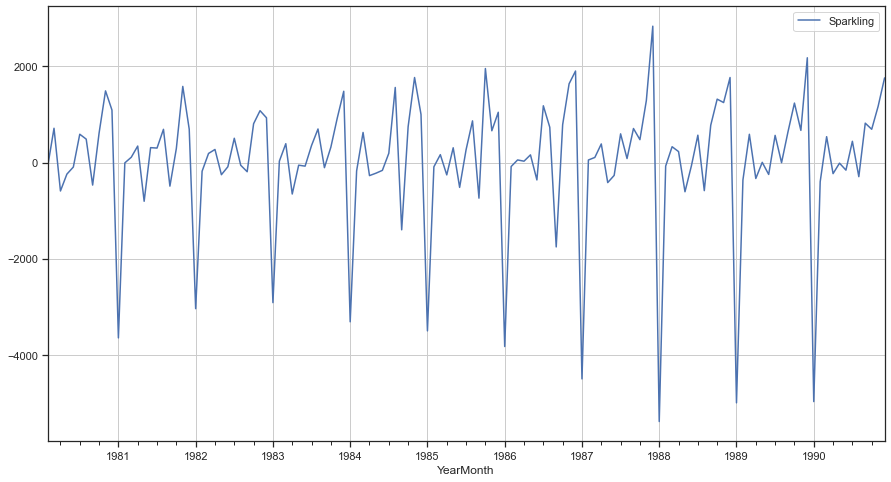

In [94]:
train.diff().dropna().plot(grid=True);


In [95]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [96]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [97]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323131676
ARIMA(0, 1, 3) - AIC:2233.9948577793975
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.5272004508324
ARIMA(1, 1, 3) - AIC:2235.6078073353247
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263084434
ARIMA(2, 1, 2) - AIC:2213.5092122831566
ARIMA(2, 1, 3) - AIC:2232.9370761971877
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498924009065
ARIMA(3, 1, 2) - AIC:2230.952332594816
ARIMA(3, 1, 3) - AIC:2221.458954306803


In [98]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2213.509212
15,"(3, 1, 3)",2221.458954
14,"(3, 1, 2)",2230.952333
11,"(2, 1, 3)",2232.937076
9,"(2, 1, 1)",2233.777626


In [99]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Mon, 21 Feb 2022   AIC                           2213.509
Time:                        10:36:15   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.218      0.0

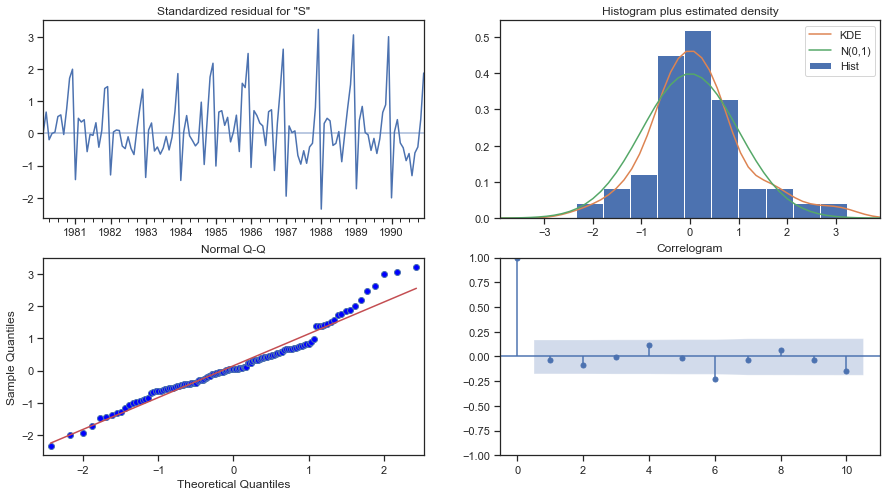

In [100]:
results_auto_ARIMA.plot_diagnostics();


In [101]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [102]:
rmse = metrics.mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = MAPE(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)


RMSE: 1299.9796397916396 
MAPE: 47.09998646565863


In [103]:
resultsDf_ARIMA = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])


resultsDf_ARIMA

,RMSE,MAPE
"ARIMA(2,1,2)",1299.97964,47.099986


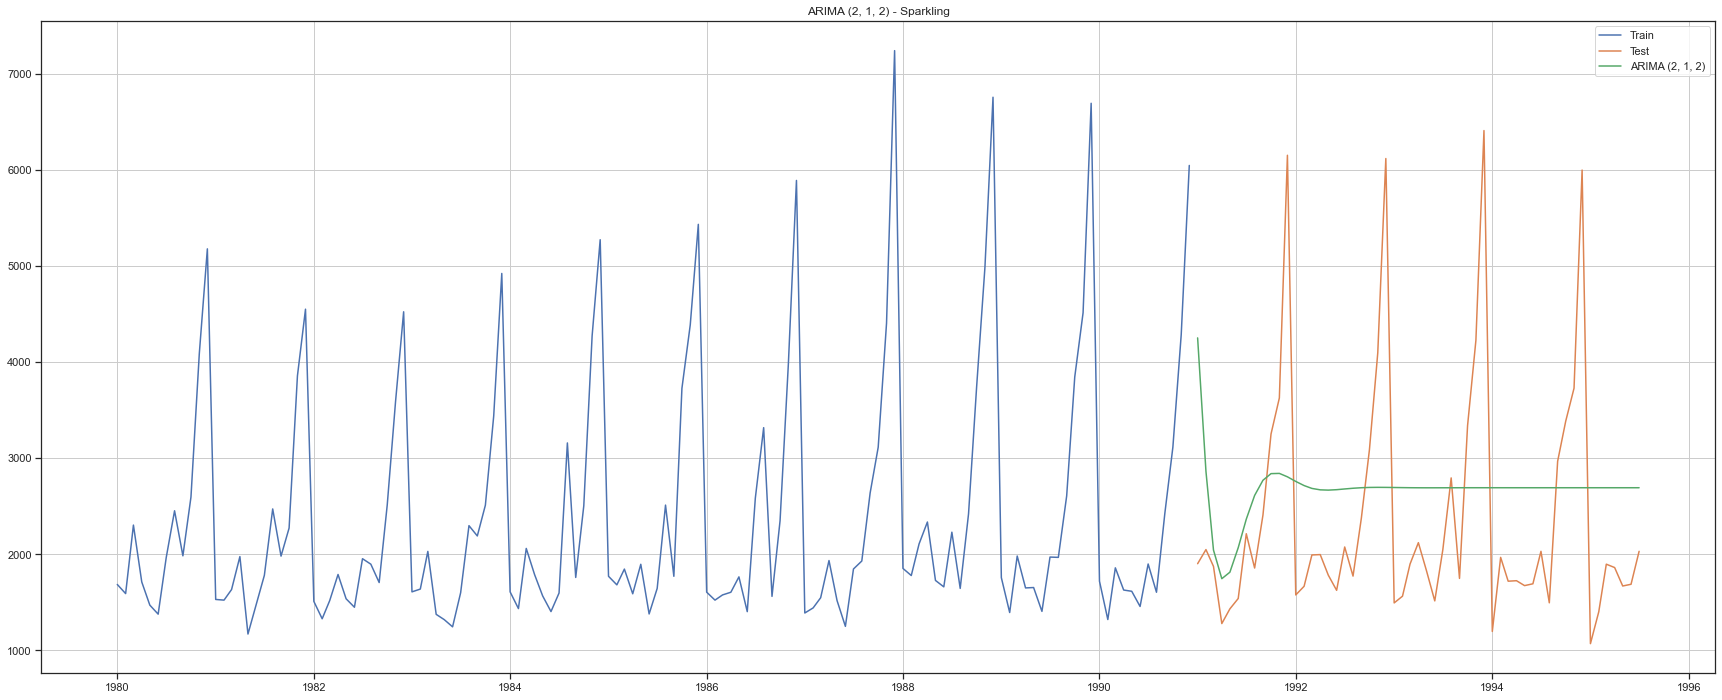

In [104]:
plt.figure(figsize=(30,12))

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_auto_ARIMA, label='ARIMA (2, 1, 2)')

plt.title('ARIMA (2, 1, 2) - Sparkling')
plt.grid()
plt.legend(loc='best')

# ACF and PACF

Text(0.5, 1.0, 'Sparkling Training Data Autocorrelation')

<Figure size 1080x1080 with 0 Axes>

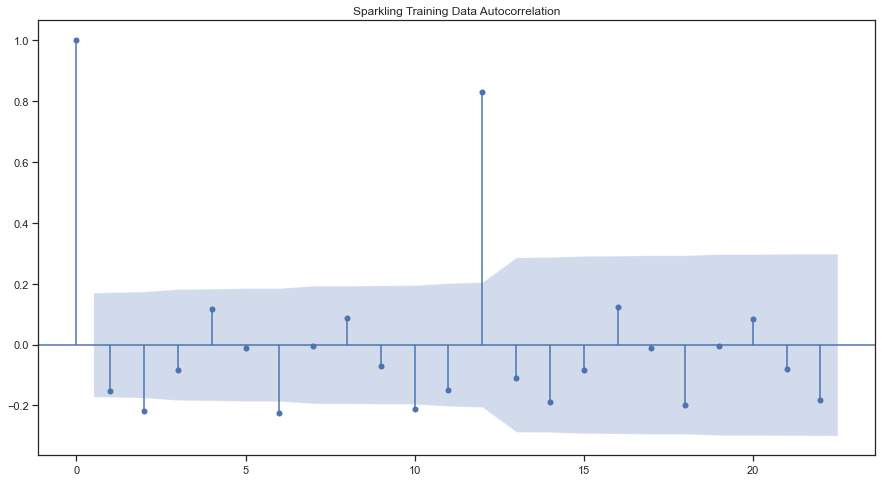

In [105]:
plt.figure(figsize=(15,15))
plot_acf(train.diff(),missing='drop')
plt.title('Sparkling Training Data Autocorrelation')

Text(0.5, 1.0, 'Sparkling Training Data Partial Autocorrelation')

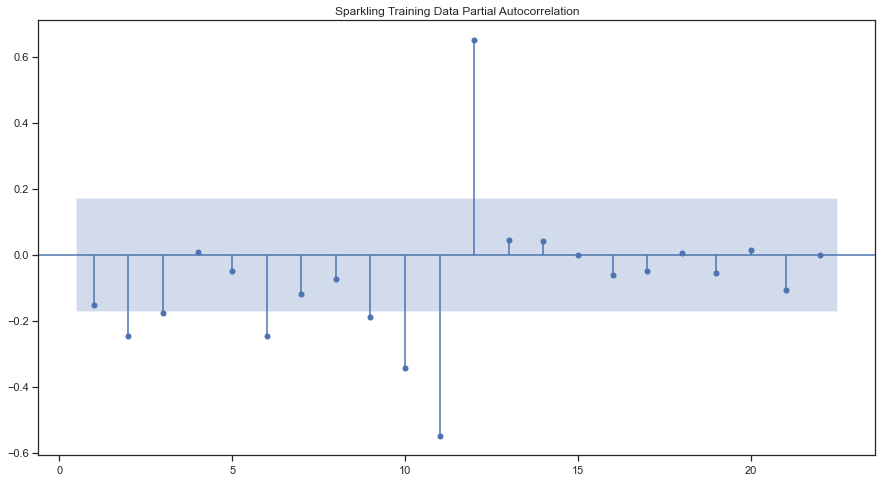

In [106]:
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.title('Sparkling Training Data Partial Autocorrelation')

In [107]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Mon, 21 Feb 2022   AIC                           2267.663
Time:                        10:36:18   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

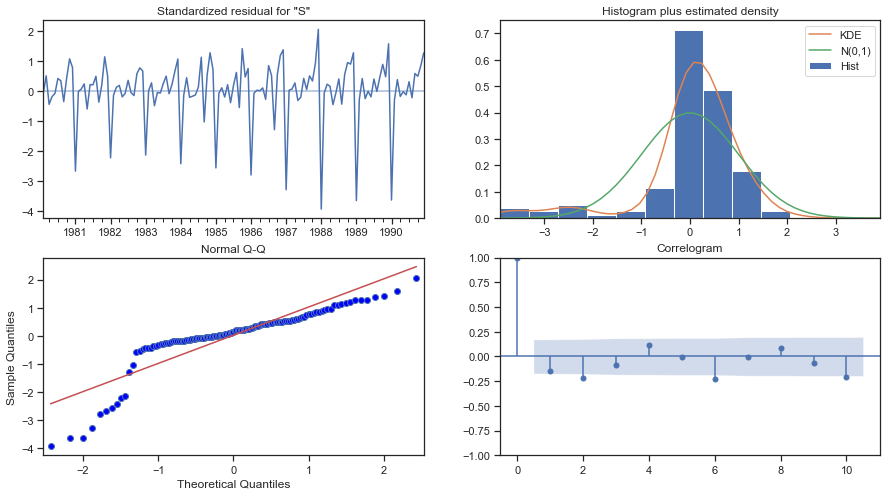

In [108]:
results_manual_ARIMA.plot_diagnostics();


In [109]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [110]:
rmse = metrics.mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = MAPE(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3864.2793518443914 
MAPE: 201.32764950352743


In [111]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,0)'])


resultsDf_ARIMA = pd.concat([resultsDf_ARIMA,temp_resultsDf])

resultsDf_ARIMA

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979640,47.099986
"ARIMA(0,1,0)",3864.279352,201.327650


Text(0.5, 1.0, 'ARIMA (0, 1, 0) Forecast- Sparkling')

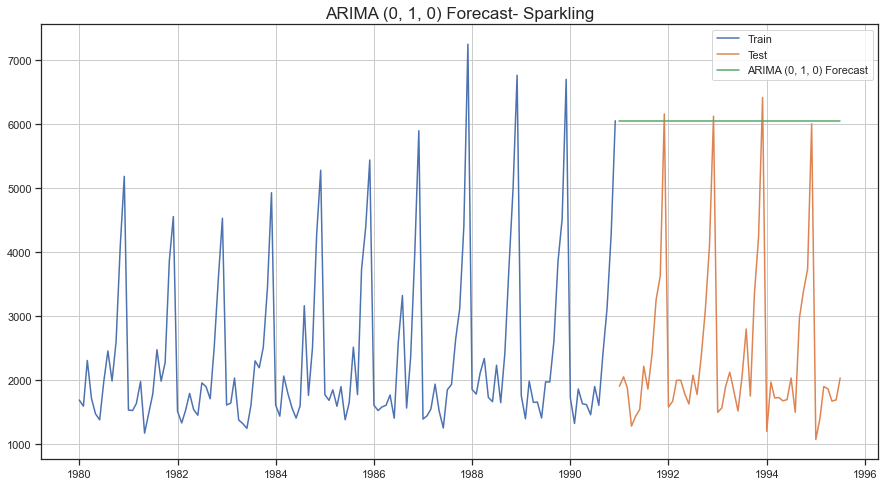

In [112]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predicted_manual_ARIMA, label='ARIMA (0, 1, 0) Forecast')

plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (0, 1, 0) Forecast- Sparkling', fontsize=17)

# Automated SARIMA

In [113]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [114]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [115]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640235496
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:7364.552978196196
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389083
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791944
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3847.605547585786
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158611443
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920774
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:4176.280214342326
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308408
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625834
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530063822
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:5030.149681550564
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956687
SARIMA(0, 1, 1)

SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888282546003
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2970.0774360945743
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.123506089688
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595857703485
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428643854995
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3113.975599612109
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.467332720137
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1221326617342
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.8241377420125
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:4701.250209420252
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681149359595
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372612883312
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523433339908
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:7216.6843086160425
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931211306
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6005734246855
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404035073365
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3345.658314784888
SARIMA(2, 1, 2)

In [116]:
SARIMA_AIC.sort_values(by=['AIC']).head(20)

,param,seasonal,AIC
211,"(3, 1, 1)","(0, 0, 3, 12)",16.000000
243,"(3, 1, 3)","(0, 0, 3, 12)",357.367162
51,"(0, 1, 3)","(0, 0, 3, 12)",737.043695
252,"(3, 1, 3)","(3, 0, 0, 12)",1387.497014
220,"(3, 1, 1)","(3, 0, 0, 12)",1387.788331
237,"(3, 1, 2)","(3, 0, 1, 12)",1388.602616
221,"(3, 1, 1)","(3, 0, 1, 12)",1388.681486
222,"(3, 1, 1)","(3, 0, 2, 12)",1389.195908
238,"(3, 1, 2)","(3, 0, 2, 12)",1389.715899
254,"(3, 1, 3)","(3, 0, 2, 12)",1391.692742


In [117]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3, 1, 1),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                  Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(0, 0, [1, 2, 3], 12)   Log Likelihood                   0.000
Date:                                    Mon, 21 Feb 2022   AIC                             16.000
Time:                                            10:44:26   BIC                             36.261
Sample:                                        01-01-1980   HQIC                            24.181
                                             - 12-01-1990                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -4.6944   3.76e+04     -0.000      1

In [118]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3, 1, 3),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 12)   Log Likelihood                -168.684
Date:                            Mon, 21 Feb 2022   AIC                            357.367
Time:                                    10:44:30   BIC                            382.476
Sample:                                01-01-1980   HQIC                           367.497
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4070      0.891      0.457      0.648      -1.339       2.153
ar.L2         -0.7493     11.624   

In [119]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 0, [], 12)   Log Likelihood                -683.749
Date:                             Mon, 21 Feb 2022   AIC                           1387.497
Time:                                     10:44:39   BIC                           1412.715
Sample:                                 01-01-1980   HQIC                          1397.675
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6747      0.142    -11.813      0.000      -1.953      -1.397
ar.L2         -0.7437      

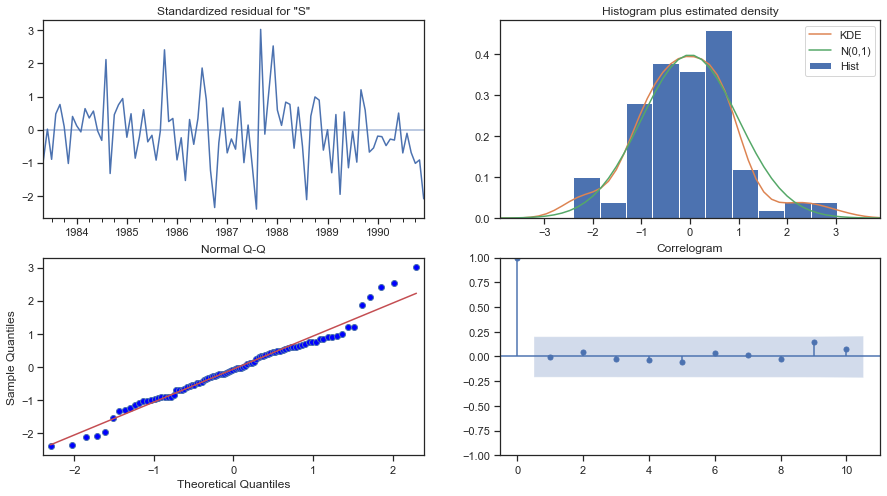

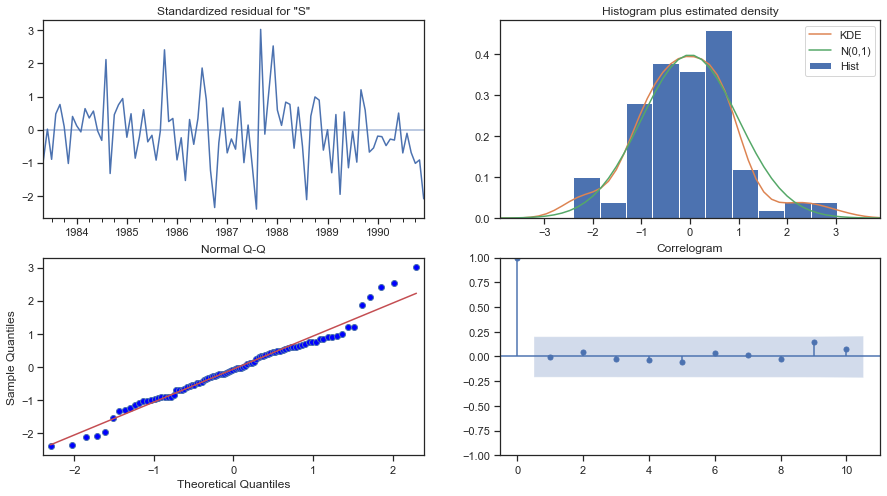

In [120]:
results_auto_SARIMA.plot_diagnostics()


In [121]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [146]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=12)

In [147]:
predicted_auto_SARIMA

In [148]:
prediction_1 = predicted_auto_SARIMA

In [149]:
prediction_1

In [122]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,1342.186415,394.835170,568.323702,2116.049128
1991-02-01,1350.586558,419.604684,528.176490,2172.996626
1991-03-01,1578.501066,421.175673,753.011915,2403.990217
1991-04-01,1667.747910,432.685709,819.699504,2515.796315
1991-05-01,1320.611028,432.719141,472.497096,2168.724959


In [123]:
rmse = metrics.mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = MAPE(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 611.2714450638045 
MAPE: 26.82019099782973


In [124]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(3,0,0,12)'])

resultsDf_ARIMA = pd.concat([resultsDf_ARIMA,temp_resultsDf])

resultsDf_ARIMA

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979640,47.099986
"ARIMA(0,1,0)",3864.279352,201.327650
"SARIMA(3,1,3)(3,0,0,12)",611.271445,26.820191


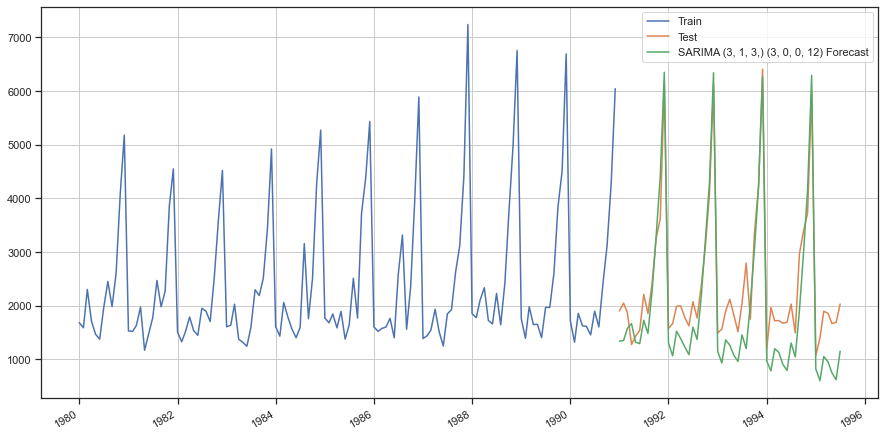

In [125]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA (3, 1, 3,) (3, 0, 0, 12) Forecast')
plt.legend(loc='best')
plt.grid()

# Manual Model

In [126]:
import statsmodels.api as sm
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA2 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA2.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                -723.264
Date:                                 Mon, 21 Feb 2022   AIC                           1454.529
Time:                                         10:44:41   BIC                           1464.702
Sample:                                     01-01-1980   HQIC                          1458.638
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1627      1.622     -0.100      0.920      -3.343       3

In [127]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA2 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA2.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -722.996
Date:                                 Mon, 21 Feb 2022   AIC                           1455.991
Time:                                         10:44:42   BIC                           1468.708
Sample:                                     01-01-1980   HQIC                          1461.128
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2445      0.879     -0.278      0.781      -1.967       1

In [128]:

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
results_manual_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -638.304
Date:                                 Mon, 21 Feb 2022   AIC                           1288.607
Time:                                         10:44:44   BIC                           1303.120
Sample:                                     01-01-1980   HQIC                          1294.438
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.0545      0.201     -5.254      0.000      -1.448      -0.661
ar.S.L24      -0.9168      0.187     -4.913      0.000      -1.283      -0.551
ar.S.L36      -0.2828      0.128     -2.202      0.028      -0.535      -0.031
ma.S.L12       0.8582      0.339      2.533      0.011       0.194       1.522
ma.S.L24       0.8162      0.496      1.646      0.100      -0.156       1.788
sigma2      2.363e+05   9.04e+04      2.613      0.009    5.91e+04    4.14e+05
===================================================================================
Ljung-Box (L1) (Q):                   9.10   Jarque-Bera (JB):                48.00
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             1.01
Prob(H) (two-sided):                  0.15   Kurtosis:                         6.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

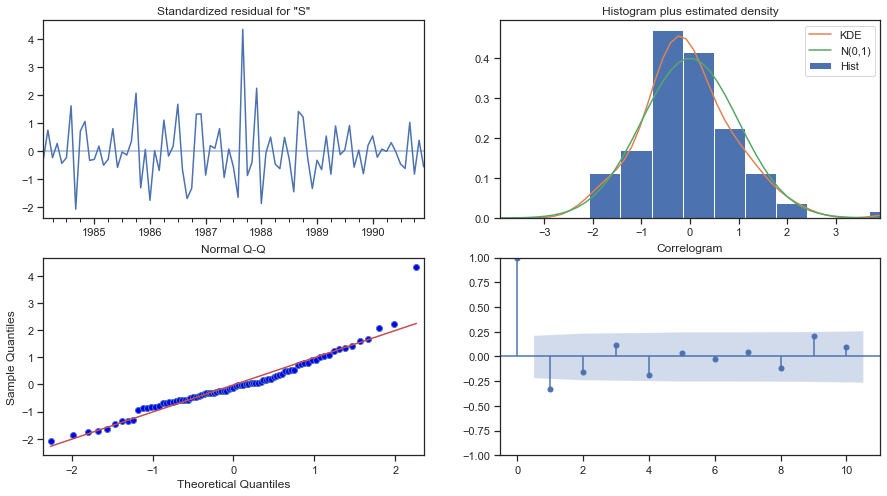

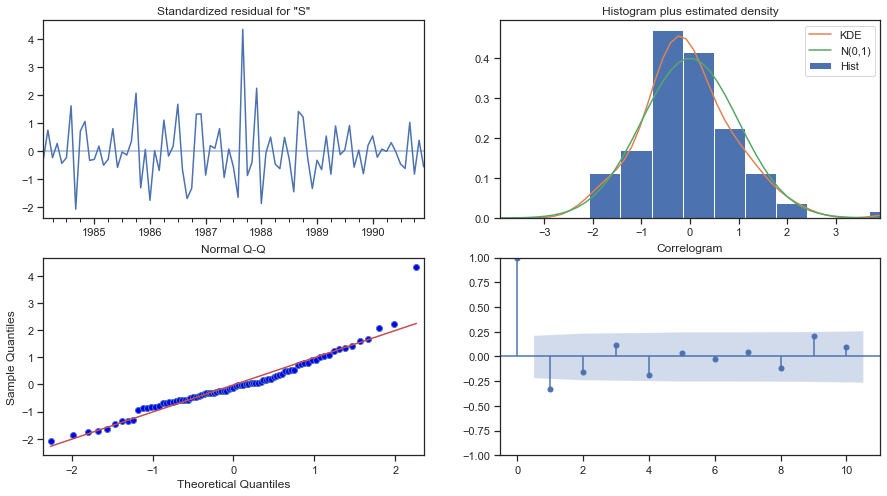

In [129]:
results_manual_SARIMA.plot_diagnostics()


In [130]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))


In [131]:
predicted_manual_SARIMA

In [132]:
rmse = metrics.mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = MAPE(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1551.6460780606133 
MAPE: 71.56618693872335


Text(0.5, 1.0, 'SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING')

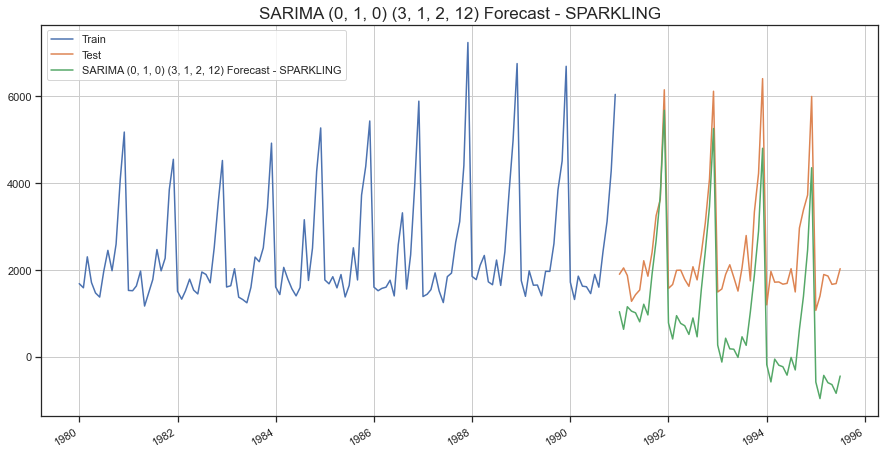

In [133]:
plt.plot(train, label='Train')
plt.plot(test, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING', fontsize=17)

In [134]:
temp = pd.DataFrame({'RMSE': [rmse],'MAPE':[mape]}
                           ,index=['SARIMA(0,1,0)(3,1,2,12)'])


resultsDf_ARIMA = pd.concat([resultsDf_ARIMA,temp])

resultsDf_ARIMA

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979640,47.099986
"ARIMA(0,1,0)",3864.279352,201.327650
"SARIMA(3,1,3)(3,0,0,12)",611.271445,26.820191
"SARIMA(0,1,0)(3,1,2,12)",1551.646078,71.566187


In [135]:
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Simple Exponential Smoothing,1338.008384
Double Exponential Smoothing,5291.879833
Triple Exponential Smoothing (Additive Season),378.626008


In [136]:
results_sparkling = pd.concat([resultsDf, resultsDf_ARIMA['RMSE']], axis=0)
results_sparkling


,Test RMSE,0
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
2pointTrailingMovingAverage,813.400684,NaN
4pointTrailingMovingAverage,1156.589694,NaN
6pointTrailingMovingAverage,1283.927428,NaN
9pointTrailingMovingAverage,1346.278315,NaN
Simple Exponential Smoothing,1338.008384,NaN
Double Exponential Smoothing,5291.879833,NaN
Triple Exponential Smoothing (Additive Season),378.626008,NaN


In [137]:
results_sparkling['RMSE']=results_sparkling['Test RMSE'].fillna(0)+results_sparkling[0].fillna(0)
results_sparkling=results_sparkling.drop(['Test RMSE',0],axis=1)
results_sparkling

,RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Simple Exponential Smoothing,1338.008384
Double Exponential Smoothing,5291.879833
Triple Exponential Smoothing (Additive Season),378.626008


In [138]:
results_sparkling.sort_values(by='RMSE')

,RMSE
Triple Exponential Smoothing (Additive Season),378.626008
Triple Exponential Smoothing (Multiplicative Season),402.938530
"SARIMA(3,1,3)(3,0,0,12)",611.271445
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
SimpleAverageModel,1275.081804
6pointTrailingMovingAverage,1283.927428
"ARIMA(2,1,2)",1299.979640
Simple Exponential Smoothing,1338.008384
9pointTrailingMovingAverage,1346.278315


# Triple Exponential Smoothing Additive is the best Model for Sparkling

In [139]:
model_TES_ad = ExponentialSmoothing(sparkling_df,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES_ad = model_TES_ad.fit()

In [140]:
model_TES_ad.params

{'smoothing_level': 0.07584360150489734,
 'smoothing_trend': 0.03246337934618681,
 'smoothing_seasonal': 0.3760454648989396,
 'damping_trend': nan,
 'initial_level': 2356.165789834623,
 'initial_trend': -1.0229311851123335,
 'initial_seasons': array([-636.61069442, -723.28737224, -398.39008832, -473.74287226,
        -808.72230033, -815.73294822, -384.38725509,   73.30025707,
        -237.92760945,  272.36238984, 1542.01830263, 2590.74245261]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [141]:
TES_predict_ad_spark =  model_TES_ad.forecast(steps=12)
TES_predict_ad_spark
prediction_1 = TES_predict_ad_spark

In [142]:
TES_predict_ad_spark

1995-08-01    1877.734622
1995-09-01    2405.111652
1995-10-01    3242.181124
1995-11-01    3922.663793
1995-12-01    6118.743781
1996-01-01    1263.152529
1996-02-01    1592.278843
1996-03-01    1831.722542
1996-04-01    1806.471326
1996-05-01    1651.772101
1996-06-01    1586.448791
1996-07-01    1977.195224
Freq: MS, dtype: float64

In [143]:
prediction_1

1995-08-01    1877.734622
1995-09-01    2405.111652
1995-10-01    3242.181124
1995-11-01    3922.663793
1995-12-01    6118.743781
1996-01-01    1263.152529
1996-02-01    1592.278843
1996-03-01    1831.722542
1996-04-01    1806.471326
1996-05-01    1651.772101
1996-06-01    1586.448791
1996-07-01    1977.195224
Freq: MS, dtype: float64

In [144]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_ad.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_ad.resid,ddof=1)})
pred_1_df.head(12)

,lower_CI,prediction,upper_ci
1995-08-01,1159.856303,1877.734622,2595.612940
1995-09-01,1687.233333,2405.111652,3122.989971
1995-10-01,2524.302805,3242.181124,3960.059443
1995-11-01,3204.785475,3922.663793,4640.542112
1995-12-01,5400.865462,6118.743781,6836.622100
1996-01-01,545.274210,1263.152529,1981.030848
1996-02-01,874.400524,1592.278843,2310.157162
1996-03-01,1113.844223,1831.722542,2549.600861
1996-04-01,1088.593007,1806.471326,2524.349645
1996-05-01,933.893782,1651.772101,2369.650420


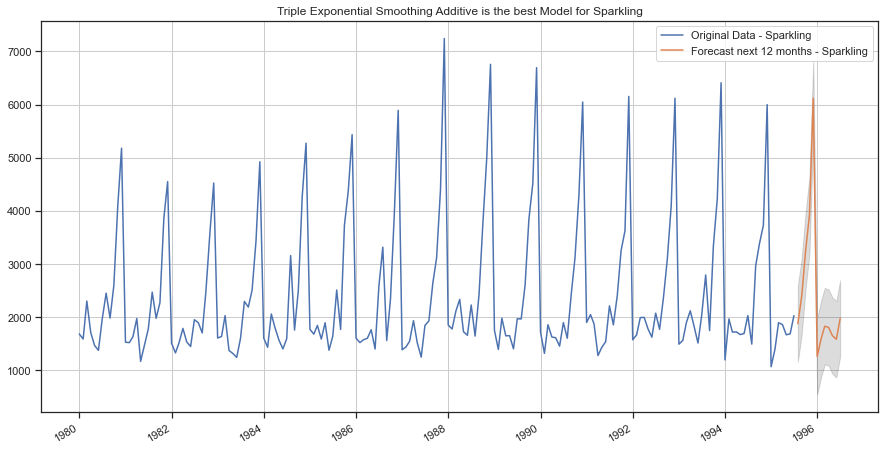

In [145]:
plt.plot(sparkling_df['Sparkling'], label='Original Data - Sparkling')

ax =prediction_1.plot(label='Forecast next 12 months - Sparkling')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Additive is the best Model for Sparkling');